# BARBERO IRIARTE, PILAR: EJERCICIOS ÁLGEBRA COMPUTACIONAL

# Ejercicio 1
Determina usando técnicas de bases de Groebner si los siguientes ideales son iguales:

- $ I : = < y^3 - z^2, xz - y^2, xy - z, x^2 -y > $

- $ J := < xy - z^2, xz - y^2, xy - z, x^2 - y > $

- $ K := < xz - y^2, x + y^2 -z - 1, xyz - 1 > $

- $ L := < y^2 - x^2y, z -xy, y - x^2 >$

Puedes ayudarte del ordenador.

**Respuesta:**

Por teoría, sabemos que dos ideales son iguales si y sólo si tienen la misma base de Groebner reducida. Vamos a utilizar el paquete _sympy_ que nos proporcina un conjunto de órdenes útiles a la hora de calcular bases de Groeber.

In [1]:
from sympy import groebner
import sympy as sp
from sympy.abc import x,y,z

In [2]:
i1 = y**3  - z**2
i2 = x*z - y**2
i3 = x*y - z
i4 = x**2 - y

In [3]:
j1 = x*y - z**2
j2 = x*z - y**2
j3 = x*y - z
j4 = x**2 - y

In [4]:
k1 = x*z -y**2 
k2 = x+y**2 - z - 1
k3 = x*y*z - 1

In [5]:
l1 = y**2 - (x**2)*y
l2 = z- x*y
l3 = y - x**2

In [6]:
GI = sp.groebner([i1, i2, i3, i4], x, y, z, order='lex', method='buchberger')
GJ = sp.groebner([j1, j2, j3, j4], x, y, z, order='lex', method='buchberger')
GK = sp.groebner([k1, k2, k3], x, y, z, order='lex', method='buchberger')
GL = sp.groebner([l1, l2, l3], x, y, z, order='lex', method='buchberger')

In [7]:
print GI
print GJ
print GK
print GL

GroebnerBasis([x**2 - y, x*y - z, x*z - y**2, y**3 - z**2], x, y, z, domain='ZZ', order='lex')
GroebnerBasis([x**2 - y, x*y - z, x*z - y**2, y**3 - z, y**2*z - y**2, z**2 - z], x, y, z, domain='ZZ', order='lex')
GroebnerBasis([x + y**2 - z - 1, y**3 - 1, y*z + y - z**3 - z**2, z**4 + z**3 - z - 1], x, y, z, domain='ZZ', order='lex')
GroebnerBasis([x**2 - y, x*y - z, x*z - y**2, y**3 - z**2], x, y, z, domain='ZZ', order='lex')


In [8]:
GI == GL

True

Podemos comprobar que el ideal $I$ y el ideal $L$ poseen la misma base de Groebner reducida, por lo que son iguales.

***

# Ejercicio 2
Calcula, sin usar el ordenador, mediante el algoritmo de Buchberger una base reducida del ideal $I = < xy + z, x^2 + y^2 >$.

**Respuesta:**

Defininimos $f_1 := xy + z$ y $f_2 := x^2 + y^2$.

Vamos a aplicar el algoritmo de Buchberger a partir de $\{f_1, f_2\}$. Fijamos el orden lex con $x > y > z$. Comenzamos con la base de Groebner $G':=\{f_1, f_2\}$ y comprobaremos si los $S-\text{polinomios}$ son reducibles hasta 0. 

\begin{equation} 
S(f_1, f_2) = \frac{x^2 y}{xy} f_1 - \frac{x^2 y}{x^2} f_2 = x(xy + z) - y(x^2+y^2) = xz - y^3
\end{equation}

Este polinomio ya no es reducible por $G'$, así que lo añadimos a la base $G':=\{f_1, f_2, f_3:=xz - y^3\}$

Ahora $S(f_1, f_2)$ sí que es reducible a 0, ya que hemos añadido $xz - y^3$ a la base, pero quedan otros $S-$polinomios que comprobar,

\begin{equation} 
S(f_1, xz - y^3) = \frac{xyz}{xy} f_1 - \frac{xyz}{xz} (xz - y^3) = z(xy + z) - y (xz - y^3) = y^4 + z^2
\end{equation}

Este polinomio no puede ser reducible por ninguno de los demás polinomios de la base ($LT(y^4 + z^2) = y^4$ no es divisibile por ningún $LT$ de la base $G'$), así que lo añadimos.

\begin{equation} 
S(f_2, xz - y^3) = \frac{x^2 z}{x^2} f_2 - \frac{x^2 z}{xz} (xz - y^3) = z(x^2 + y^2) - x(xz - y^3) = zy^2 + xy^3 = y^2(xy + z) \xrightarrow{y^2f_1} 0
\end{equation} 

Estamos en la situación de que $G'=\{xy + z, x^2 + y^2, f_3:=xz - y^3, f_4:=y^4 + z^2\}$ podría ser nuestra base de Groebner, pero al haber añadido el polinomio $f_4:=y^4 + z^2$, debemos comprobar los demás $S-$polinomios que nos surgen al hacer esta adición.  

\begin{equation} 
S(f_1,f_4) = \frac{xy^4}{xy} (xy+z) - \frac{xy^4}{y^4} (y^4 + z^2) = y^3(xy+z) - x(y^4+z^2) = -xz^2 + y^3z \xrightarrow{zf_3} 0  
\end{equation} 

\begin{equation} 
S(f_2, f_4) = \frac{x^2y^4}{x^2} (x^2+y^2) - \frac{x^2y^4}{y^4} (y^4+z^2) = y^4(x^2+y^2) - x^2(y^4+z^2) = -x^2z^2 + y^6 \xrightarrow{-xz f_3} -xy^3z+y^6 \xrightarrow{-y^2zf_1} y^6+y^2z^2 \xrightarrow{y^2f_4} 0
\end{equation} 

\begin{equation} 
S(f_3, f_4) = \frac{xy^4z}{xz} (xz-y^3) - \frac{xy^4z}{y^4} (y^4+z^2) = y^4(xz-y^3) - xz(y^4+z^2) = -xz^3-y^7 \xrightarrow{-z^2 f_3} -y^7 - z^2y^3 \xrightarrow{-y^3f_4} 0
\end{equation} 

Podemos concluir que $G:=\{f_1:=xy + z, f_2:=x^2 + y^2, f_3:=xz - y^3, f_4:=y^4 + z^2\}$ es una base de Groebner.

Es reducida, ya que $\forall g\in G$, $LC(g) = 1$ y además, $LT(g)$ no es dividido por ningún otro $LT(g')$ con $g' \in G \setminus \{g\}$

Podemos comprobarlo gracias a la función _groebner_ que nos proporciona el paquete de funciones _Sympy_.

In [9]:
f1=x*y + z
f2=x**2 + y**2
G=sp.groebner([f1,f2], x, y, z, order='lex', method='buchberger')
G

GroebnerBasis([x**2 + y**2, x*y + z, x*z - y**3, y**4 + z**2], x, y, z, domain='ZZ', order='lex')

***

 Determina también sin usar el ordenador si la clase $[x + 1]$ es invertible en $k[x,y,z]/I$

**Respuesta:**

Observemos que si $[x+1]$ es invertible entonces $(x+1)f + (xy+z)g + (x^2 + y^2)h = 1$, así que vamos a calcular el ideal de $ < x+1, xy +z, x^2+y^2 > $

Definimos $f_1:= x+1, f_2:=xy + z, f_3:=x^2+y^2$, y calculamos su correspondiente base de Groebner. Volvemos a aplicar el algoritmo de Buchberger a esta base $G':=\{f_1, f_2, f_3\}$. Empezamos a calcular los $S-$polinomios, 

 \begin{equation}
    S(f_1, f_2) = S(x+1, xy+z) = \frac{xy}{x} (x+1) - \frac{xy}{xy} (xy + z) = y - z \qquad \qquad \text{(1)}
\end{equation}

Como $LT(y - z)$ no es divisible por ningún $LT(g)$ para $g$ polinomio en nuestra base, añadimos $f_4:=y-z$ a la base de Groebner, quedándonos así $G'= \{f_1, f_2, f_3, f_4:=y-z\}$. 

Como hemos añadido $f_4$ a la nueva base, debemos comprobar los nuevos $S-$polinomios que genera.

\begin{equation}
    S(f_1, f_4) = S(x+1, y-z) = \frac{xy}{x} (x+1) - \frac{xy}{y}(y-z) = xz + y \xrightarrow{z f_1} y - z \xrightarrow{f_4} 0        \qquad \qquad \text{(2)}
\end{equation}

\begin{equation}
    S(f_2, f_4) = S(xy+z, y-z) = \frac{xy}{xy} (xy+z)- \frac{xy}{y} (y-z) = xz + z \xrightarrow{z f_1} 0 \qquad \qquad \qquad \qquad \text{(3)}
\end{equation}

\begin{equation}
    S(f_3, f_4) = S(x^2+y^2, y-z) = \frac{x^2 y}{x^2}(x^2 + y^2) - \frac{x^2 y}{y}(y-z) = x^2z + y^3 \xrightarrow{z f_3} y^3 - y^2z \xrightarrow{y^2 f_4} 0 \qquad  \text{(4)}
\end{equation}

Continuamos el proceso con los $S-$polinomios anteriores,

\begin{equation}
    \begin{array}{l l}
        S(f_1, f_3)&  = S(x+1, x^2+y^2) = S(x+1, x^2 + y^2) = \frac{x^2}{x} (x+1) - \frac{x^2}{x^2}(x^2 + y^2) \\[0.2cm]
        & = x - y^2 \xrightarrow{f_1} -y^2 - 1 \xrightarrow{-y f_4} -yz - 1 \xrightarrow{-z f_4} -z^2-1 \qquad  \text{(5)}
    \end{array}
\end{equation}

Como $LT(z^2) - 1$ no es divisible por ningún $LT(g)$ para $g$ polinomio en nuestra base, añadimos $f_5:=-z^2 - 1$ a la base $G':=\{f_1, f_2, f_3, f_4, f_5:=-z^2 - 1\}$. Al añadirlo, debemos comprobar los $S-$polinomios que se nos generan,

\begin{equation}
    S(f_1, f_5) = S(x+1, -z^2-1) = \frac{-xz^2}{x} (x+1) - \frac{-xz^2}{-z^2}(-z^2-1) = x-z^2 \xrightarrow{f_1} -z^2 - 1 \xrightarrow{f_ 5} 0 \qquad  \text{(6)}
\end{equation}

\begin{equation}
    S(f_2, f_5) = S(xy+z, -z^2-1) = \frac{-xyz^2}{xy} (xy+z) - \frac{-xyz^2}{-z^2}(-z^2-1) =  xy-z^3 \xrightarrow{f_2} -z^3 - z \xrightarrow{z f_5} 0  \qquad  \text{(7)}
\end{equation}

\begin{equation}
    S(f_3, f_5) = S(x^2+y^2, -z^2-1) = \frac{-x^2z^2}{x^2} (x^2+y^2) - \frac{-x^2z^2}{-z^2}(-z^2-1) = x^2-y^2z^2 \xrightarrow{f_3} y^2(-z^2 - 1) \xrightarrow{f_5} 0 \qquad  \text{(8)}
\end{equation}

\begin{equation}
    S(f_4, f_5) = S(y-z, -z^2-1) = \frac{-yz^2}{y} (y-z) - \frac{-yz^2}{-z^2}(-z^2-1) = y + z^3 \xrightarrow{f_4} z^3 + z \xrightarrow{f_5} 0 \qquad  \text{(9)}
\end{equation}

Continuamos el proceso con la demás combinaciones que nos quedan con la base $G'=\{f_1, f_2, f_3, f_4, f_5\}$

\begin{equation}
    S(f_2, f_3) = S(xy+z, x^2+y^2) = \dots = xz - y^3 \xrightarrow{zf_1} -y^3 - z \xrightarrow{-y^2 f_4} -y^2z - z \xrightarrow{-yz f_4} -z^2y - z \xrightarrow{-z^2 f_4} -z^3 - z \xrightarrow{z f_5} 0 \qquad  \text{(10)}
\end{equation}

La base de Groebner del ideal $< x+1, xy+z, x^2+y^2 >$ es,

$$G=\{f_1=x+1, f_2=xy+z, f_3=x^2+y^2, f_4=y-z, f_5=-z^2-1\}$$

Comprobamos las dos condiciones para que sea reducida,

- $\forall g\in G, LC(g) = 1$ así que cambiamos el signo a $f_5$.
- $LT(f_1)=LT(x+1) = x$ divide a $LT(f_2) = LT(xy+z) = xy$ y a $LT(f_3) = LT(x^2+y^2) = x^2$, por lo que es posible expulsar a $f_2$ y $f_3$ de la base, y conseguimos la base reducida.

$$ G=\{f_1=x+1, f_4=y-z, f_5=z^2+1\}$$

In [10]:
f1=x+1
f2=x*y + z
f3=x**2 + y**2
G=sp.groebner([f1,f2,f3], x, y, z, order='lex', method='buchberger')
G

GroebnerBasis([x + 1, y - z, z**2 + 1], x, y, z, domain='ZZ', order='lex')

***

# Ejercicio 3
Calcula el abanico de Groebner del ideal $< x^2 − y^3 , x^3 − y^2 + x >$.


**Respuesta:**

Calculamos primero las bases de groebner asociadas a este ideal, para cada orden distinto.

In [11]:
g1 = x**2 - y**3 
g2 = x**3 - y**2 + x
G1 = sp.groebner([g1,g2], x, y, order='lex', method='buchberger') # Orden lex x > y
G2 = sp.groebner([g1,g2], y, x, order='lex', method='buchberger') # Orden lex y > x
G3 = sp.groebner([g1,g2], x, y, order='grevlex', method='buchberger') # Orden grevlex x > y
G4 = sp.groebner([g1,g2], y, x, order='grevlex', method='buchberger') # Orden grevlex y > x
G5 = sp.groebner([g1,g2], x, y, order='grlex', method='buchberger')
G6 = sp.groebner([g1,g2], y, x, order='grlex', method='buchberger')

for i in [G1,G2,G3,G4,G5,G6]:
    print i

GroebnerBasis([x + y**7 + y**4 - y**2, y**9 + 2*y**6 - y**4 + y**3], x, y, domain='ZZ', order='lex')
GroebnerBasis([-x**3 - x + y**2, x**7 + 2*x**5 + x**3 - x**2 + x*y, x**8 + 3*x**6 + 3*x**4 - x**3 + x**2], y, x, domain='ZZ', order='lex')
GroebnerBasis([x**3 - y**2 + x, y**3 - x**2], x, y, domain='ZZ', order='grevlex')
GroebnerBasis([y**3 - x**2, x**3 - y**2 + x], y, x, domain='ZZ', order='grevlex')
GroebnerBasis([x**3 - y**2 + x, y**3 - x**2], x, y, domain='ZZ', order='grlex')
GroebnerBasis([y**3 - x**2, x**3 - y**2 + x], y, x, domain='ZZ', order='grlex')


Calculemos sus correspondientes conos:

- $C_{G_1} = \{(a,b)\in \mathbb{R}_{\geq 0}^2 | a\geq 7b \}$
- $C_{G_2} = \{(a,b)\in \mathbb{R}_{\geq 0}^2 | a+b\geq 7a \} $ 
- $C_{G_3} = \{(a,b)\in \mathbb{R}_{\geq 0}^2 | 3a\geq 2b, 2a\geq 3b \} $
- $C_{G_4} = \{(a,b)\in \mathbb{R}_{\geq 0}^2 | 3b\geq 2a, 2b\geq 3a \} $
- $C_{G_5} = \{(a,b)\in \mathbb{R}_{\geq 0}^2 | 3a\geq 2b, 2a\geq 3b \} $
- $C_{G_6} = \{(a,b)\in \mathbb{R}_{\geq 0}^2 | 3b\geq 2a, 2b\geq 3a \} $

A simple vista podemos observar que el cono $C_{G_3}$ es igual al cono $C_{G_5}$, al igual que el cono $C_{G_4}$ y el cono $C_{G_6}$.

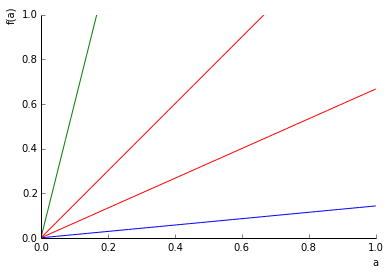

In [132]:
import matplotlib.pyplot as plt
import sympy as sp
%matplotlib inline

a = sp.symbols('a')

p1=sp.plot(a/7, (a, 0, 1), show=False, line_color='b') # cono C_G1
p2=sp.plot(3*a/2, (a, 0, 1), show=False, line_color='r')
p3=sp.plot(2*a/3, (a, 0, 1), show=False, line_color='r') 
p4=sp.plot(6*a, (a, 0, 1), show=False, line_color='g') # cono C_G2

p2.extend(p1)
p3.extend(p2)
p4.extend(p3)

p4.ylim = (0,1)
p4.show()

- El cono $C_{G_1}$ queda delimitado por la recta azul y el eje de las $x$'s.
- El cono $C_{G_2}$ queda delimitado por la recta verde y el eje de las $y$'s.
- El cono $C_{G_3}$ queda delimitado por la recta azul y su recta roja más próxima.
- El cono $C_{G_4}$ queda delimitado por la recta verde y su recta roja más próxima.

Nos queda el cono delimitado por las dos rectas rojas, es decir, tiene la forma,

- $C_{G_7} = \{(a,b)\in \mathbb{R}_{\geq 0}^2 | 3a\geq 2b, 3b\geq 2a \} $

Esto es un cono asociado al orden $>_{M}$ donde $M=\begin{pmatrix} 1 & 1 \\ 1 & 1 \end{pmatrix}$.

***

Utilizando **SAGE**:

En sage, podemos computar todas las bases de Groebner asociadas a un ideal con sus distintos órdenes usando el paquete de funciones de _sage_.

In [76]:
import sage.all as sg
x,y=sg.QQ['x,y'].gens()
i= sg.ideal(x**2 - y**3, x**3 - y**2 + x)
g = i.groebner_fan()
g.reduced_groebner_bases()

[[y^9 + 2*y^6 - y^4 + y^3, y^7 + y^4 - y^2 + x],
 [y^7 + y^4 - y^2 + x, -y^6 + x*y^2 - y^3, -y^3 + x^2],
 [y^6 - x*y^2 + y^3, x*y^3 - y^2 + x, -y^3 + x^2],
 [y^3 - x^2, x^3 - y^2 + x],
 [-x^3 + y^2 - x, x^3*y - x^2 + x*y, x^6 + 2*x^4 - x^2*y + x^2],
 [-x^3 + y^2 - x, -x^6 - 2*x^4 + x^2*y - x^2, x^7 + 2*x^5 + x^3 - x^2 + x*y],
 [-x^3 + y^2 - x, x^7 + 2*x^5 + x^3 - x^2 + x*y, x^8 + 3*x^6 + 3*x^4 - x^3 + x^2]]

In [77]:
pf = g.polyhedralfan()
print pf.rays()

[[0, 1], [1, 0], [1, 4], [1, 6], [2, 3], [3, 2], [4, 1], [7, 1]]


Vamos a dibujar el abanico de Groebner,

In [78]:
import matplotlib.lines as lines
import matplotlib.pyplot as plt
%matplotlib inline

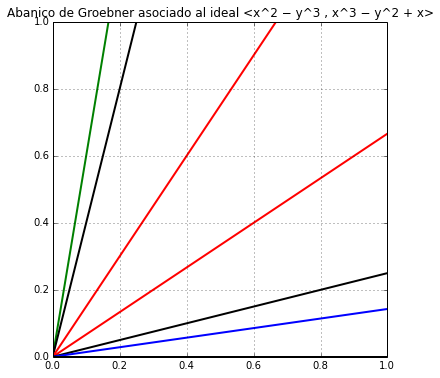

In [136]:
fig, ax = plt.subplots()
fig.set_size_inches(6,6)

ax.set_xlim([0,1])
ax.set_ylim([0,1])

line0= [(0,0),pf.rays()[0]]
line1= [(0,0),pf.rays()[3]]
line2= [(0,0),pf.rays()[2]]
line3= [(0,0),pf.rays()[4]]
line4= [(0,0),pf.rays()[5]]
line5= [(0,0),pf.rays()[6]]
line6= [(0,0),pf.rays()[7]]
line7= [(0,0),pf.rays()[1]]

(line0_xs, line0_ys) = zip(*line0)
(line1_xs, line1_ys) = zip(*line1)
(line2_xs, line2_ys) = zip(*line2)
(line3_xs, line3_ys) = zip(*line3)
(line4_xs, line4_ys) = zip(*line4)
(line5_xs, line5_ys) = zip(*line5)
(line6_xs, line6_ys) = zip(*line6)
(line7_xs, line7_ys) = zip(*line7)

ax.add_line(lines.Line2D(line0_xs, line0_ys, linewidth=2, color='black'))
ax.add_line(lines.Line2D(line1_xs, line1_ys, linewidth=2, color='green'))
ax.add_line(lines.Line2D(line2_xs, line2_ys, linewidth=2, color='black'))
ax.add_line(lines.Line2D(line3_xs, line3_ys, linewidth=2, color='red'))
ax.add_line(lines.Line2D(line4_xs, line4_ys, linewidth=2, color='red'))
ax.add_line(lines.Line2D(line5_xs, line5_ys, linewidth=2, color='black'))
ax.add_line(lines.Line2D(line6_xs, line6_ys, linewidth=2, color='blue'))
ax.add_line(lines.Line2D(line7_xs, line7_ys, linewidth=2, color='black'))

plt.title(u'Abanico de Groebner asociado al ideal <x^2 − y^3 , x^3 − y^2 + x>')
ax.grid(True)
plt.plot();

***

## Ejercicio 4
¿Puede escribirse $4x^4y^2 + 4y^6 - 2x^4 - 4x^2y^2 - 6y^4 + 2x^2 + 4y^2 -1$ de la forma $h(x^2 + y^2 + 1, x^2 - y^2)$ para algún polinomio $h\in \mathbb{Q}[x,y]$?

**Respuesta:**

Podemos calcular la base de Groebner asociada al ideal $< x^2 + y^2 + 1, x^2-y^2 >$ y veremos si el polinomio $4x^4y^2 + 4y^6 - 2x^4 -4x^2y^2 - 6y^4 + 2x^2 + 4y^2 - 1$ es reducible por esta base.

$f_1:=x^2+y^2+1$, $f_2:=x^2-y^2$, inicializamos $G':=\{f_1, f_2\}$

\begin{equation}
    S(f_1,f_2) = \frac{x^2}{x^2} (x^2+y^2+1) - \frac{x^2}{x^2} (x^2-y^2) = 2y^2+1
\end{equation}

Añadimos a nuestra base $f_3:=2y^2 + 1$ ya que su $LT(f_3) = 2y^2$ no es divisible por ningún otro $LT(g)$ para $g\in G'$

Seguimos calculando $S-$polinomios de la nueva base $G'':=\{f_1, f_2, f_3\}$

\begin{equation}
    S(f_1, f_3) = \frac{2x^2y^2}{x^2} (x^2+y^2+1) - \frac{2x^2y^2}{2y^2} (2y^2+1) = -x^2 + 2y^4 + 2y^2 \xrightarrow{f_2} 2y^4 + y^2 \xrightarrow{y^2 f_3} 0
\end{equation}

\begin{equation}
    S(f_2, f_3) = \frac{2x^2y^2}{x^2} (x^2-y^2) - \frac{2x^2y^2}{2y^2} (2y^2+1) = -x^2-2y^4 \xrightarrow{- f_2} -2y^4 - y^2 \xrightarrow{-y^2 f_3} 0
\end{equation}

La base nos queda $G'':=\{x^2+y^2+1, x^2-y^2, 2y^2+1\}$. La podemos reducir ya que $LT(f_1)$ divide a $LT(f_2)$, sumamos los dos polinomios, $f_1 + f_2 = x^2 + y^2 +1 + x^2 - y^2 = 2x^2 + 1$.

Así $G:=\{2x^2 + 1, 2y^2 + 1\}$.

O, utilizando _sympy_:

In [81]:
from sympy import groebner
import sympy as sp
from sympy.abc import x,y,z

a1=x**2+y**2+1
a2=x**2 - y**2
f=4*(x**4)*(y**2)  + 4*y**6 - 2*x**4 - 4*(x**2)*(y**2) - 6*(y**4) + 2*x**2 + 4*y**2 - 1
G = sp.groebner([a1,a2])
G

GroebnerBasis([2*x**2 + 1, 2*y**2 + 1], x, y, domain='ZZ', order='lex')

Procedemos a reducir el polinomio a través de los polinomios de la base de Groebner, $f_1:=2x^2 + 1$, $f_2:=2y^2+1$,

\begin{equation}
    \begin{array}{l l}
        4x^4y^2 + 4y^6 - 2x^4 -4x^2y^2 - 6y^4 + 2x^2 + 4y^2 - 1 \xrightarrow{2x^2y^2 f_1} 4y^6 - 2x^4 -6x^2y^2 - 6y^4 + 2x^2 + 4y^2 - 1 \xrightarrow{2y^4 f_2} -2x^4 - 6x^2y^2 - 8y^4 + 2x^2 + 4y^2-1 \xrightarrow{-x^2 f_1} -6x^2y^2 - 8y^4 + 3x^2 + 4y^2 - 1 \xrightarrow{-3 f_1} -8y^4 + 3x^2 + 7y^2 - 1 \xrightarrow{-4y^2 f_2} 3x^2 + 11y^2 - 1 \xrightarrow{3/2 f_1} 11y^2 - \frac{5}{2} \xrightarrow{11/2 f_2} -8 
    \end{array}
\end{equation}


O, utilizando la orden de _sympy_ de _reduce_ obtenemos el mismo resto:

In [82]:
G.reduce(f)

([2*x**2*y**2 - x**2 - 3*y**2 + 3/2, 2*y**4 - 4*y**2 + 11/2], -8)

Por lo que concluimos que no es reducible, así que **no** existe un $h\in \mathbb{Q}[x,y]$ que cumpla nuestra condición.

***